<p align="center">
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/b/bd/Northeastern_University_seal.svg/225px-Northeastern_University_seal.svg.png">
</p>
<h2><center>College of Professional Studies</center></h2>
<h2><center>Northeastern University Silicon Valley</center></h2>
<h3><center>CPS Python Workshop</center></h3>
<h3><center>Hackthon: Thematic Analysis of Song Lyrics</center></h3>
<h3><center>Submitted on:</center></h3> 
<font size="4"><center>Nov 23, 2022</center></font>
<h3><center>Submitted to:</center></h3>
<font size="4"><center>Professor: Dr. Shanu Sushmita</center></font>
<font size="4"><center>Dr. Ghazal Tariri</center></font>
<font size="4"><center>Mohammad Zandsalimy</center></font>
<h3><center>Submitted by:</center></h3>
<font size="4"><center>Nikshita Ranganathan</center></font>
<font size="4"><center>Pavan Kumar Bansal</center></font>
<font size="4"><center>Shyamala Venkatakrishnan</center></font>

## Table of Contents:

> <font size="4">1. [Introduction](#introduction)</font>

> <font size="4">2. [Analysis](#Analysis)</font>
  
> <font size="4">3. [Conclusion](#Conclusion)</font>

> <font size="4">4. [References](#References)</font>

> <font size="4">5. [Appendix](#Appendix)</font>



<h2><center>Introduction <a name="introduction"></a></center></h2>

We have used the Song Lyrics dataset fro Kaggle site, which has several artist's data over varity of genres.
We are going to use the Google Colob to run this code becuase of the volume of file using the GPU.

Below is our pipeline approach for this project:

**Data cleaning :**
  -  Rename
  -  Removing NA
  -  Filling missing values

**EDA :**
  - Top  songs in each genre based on popularity 
  - Artist with most songs
  - Artist with most popularity
  - Most popular genre

**NLP :**
  - Lowercasing
  - tokenization
  - stopwords
  - punctuation removal
  - Frequency Distribution , Condition frequecny Distribution
  - Sentiment/emotion
  - Reletive frequecny
  - Word cloud using word Net 


<h2><center>Analysis <a name="Analysis"></a></center></h2>

# Setting up the environment

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Tokenization of text
from nltk.tokenize import word_tokenize,sent_tokenize
#remove stop-words
from nltk.corpus import stopwords # library 
nltk.download('stopwords')
from nltk.stem import PorterStemmer
all_stopwords = set(stopwords.words('english')) # set the language 
from typing import List
nltk.download('punkt')
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
# please for code here
lyrics = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackthondata.csv')
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69597 entries, 0 to 69596
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SName       69597 non-null  object 
 1   SLink       69597 non-null  object 
 2   Lyric       69597 non-null  object 
 3   language    69597 non-null  object 
 4   Artist      69227 non-null  object 
 5   Genres      69225 non-null  object 
 6   Songs       69226 non-null  float64
 7   Popularity  69226 non-null  float64
 8   ALink       69597 non-null  object 
dtypes: float64(2), object(7)
memory usage: 4.8+ MB


In [5]:
lyrics.head(5)

SName  \
0                                   Careless Whisper   
1  Could You Be Loved / Citação Musical do Rap: S...   
2                             Cruisin' (Part. Saulo)   
3                                               Easy   
4                  For Your Babies (The Voice cover)   

                                               SLink  \
0               /ivete-sangalo/careless-whisper.html   
1  /ivete-sangalo/could-you-be-loved-citacao-musi...   
2             /ivete-sangalo/cruisin-part-saulo.html   
3                           /ivete-sangalo/easy.html   
4  /ivete-sangalo/for-your-babies-the-voice-cover...   

                                               Lyric language         Artist  \
0  I feel so unsure\nAs I take your hand and lead...       en  Ivete Sangalo   
1  Don't let them fool, ya\nOr even try to school...       en  Ivete Sangalo   
2  Baby, let's cruise, away from here\nDon't be c...       en  Ivete Sangalo   
3  Know it sounds funny\nBut, I just can't stand ...       en  Ivete Sangalo   
4  You've got that look again\nThe one I hoped I ...       en  Ivete Sangalo   

                Genres  Songs  Popularity            ALink  
0  Pop; Axé; Romântico  313.0         4.4  /ivete-sangalo/  
1  Pop; Axé; Romântico  313.0         4.4  /ivete-sangalo/  
2  Pop; Axé; Romântico  313.0         4.4  /ivete-sangalo/  
3  Pop; Axé; Romântico  313.0         4.4  /ivete-sangalo/  
4  Pop; Axé; Romântico  313.0         4.4  /ivete-sangalo/

**Renaming the columns**

In [6]:
lyrics.columns = ['Song_name', 'Song_Link', 'Lyrics', 'Language','Artist','Genre','Songs','Popularity','Artist_link']
lyrics = lyrics.drop(columns=['Song_Link', 'Artist_link', 'Language'])

**Dropping the unwanted columns**

In [7]:
lyrics.head(10)

Song_name  \
0                                   Careless Whisper   
1  Could You Be Loved / Citação Musical do Rap: S...   
2                             Cruisin' (Part. Saulo)   
3                                               Easy   
4                  For Your Babies (The Voice cover)   
5                                       Human Nature   
6     Losing Control (Miss Cady feat. Ivete Sangalo)   
7                           Master Blaster (Jammin')   
8                                    More Than Words   
9                                     Natural Collie   

                                              Lyrics         Artist  \
0  I feel so unsure\nAs I take your hand and lead...  Ivete Sangalo   
1  Don't let them fool, ya\nOr even try to school...  Ivete Sangalo   
2  Baby, let's cruise, away from here\nDon't be c...  Ivete Sangalo   
3  Know it sounds funny\nBut, I just can't stand ...  Ivete Sangalo   
4  You've got that look again\nThe one I hoped I ...  Ivete Sangalo   
5  Looking out\nAcross the night time\nThe city w...  Ivete Sangalo   
6  Uh, yeah.\nGo, go, go.\nUh, yeah.\nUh, Uh, Uhh...  Ivete Sangalo   
7  Everyone's feeling pretty\nIt's hotter than Ju...  Ivete Sangalo   
8  Saying 'I Love you'\nIs not the words I want t...  Ivete Sangalo   
9  Been down in the valley\nSmoking natural colli...  Ivete Sangalo   

                 Genre  Songs  Popularity  
0  Pop; Axé; Romântico  313.0         4.4  
1  Pop; Axé; Romântico  313.0         4.4  
2  Pop; Axé; Romântico  313.0         4.4  
3  Pop; Axé; Romântico  313.0         4.4  
4  Pop; Axé; Romântico  313.0         4.4  
5  Pop; Axé; Romântico  313.0         4.4  
6  Pop; Axé; Romântico  313.0         4.4  
7  Pop; Axé; Romântico  313.0         4.4  
8  Pop; Axé; Romântico  313.0         4.4  
9  Pop; Axé; Romântico  313.0         4.4

**Visualization and Removal of NA values**






In [8]:
lyrics.isnull().sum()

Song_name       0
Lyrics          0
Artist        370
Genre         372
Songs         371
Popularity    371
dtype: int64

<Figure size 720x432 with 0 Axes>

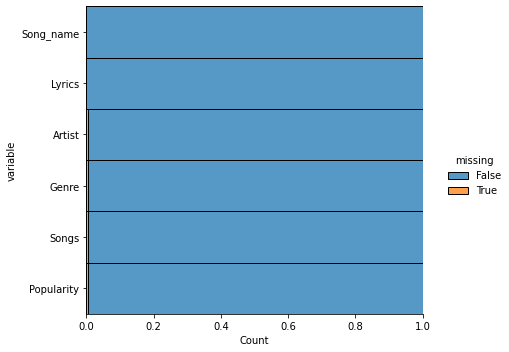

In [9]:
plt.figure(figsize=(10,6))
sns.displot(
    data=lyrics.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

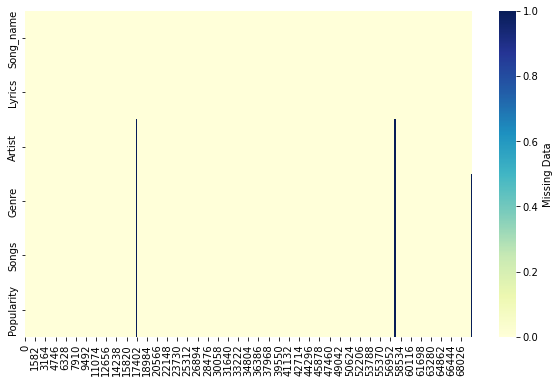

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(lyrics.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [11]:
cleanlyrics=lyrics.dropna()

In [12]:
cleanlyrics.isnull().sum()

Song_name     0
Lyrics        0
Artist        0
Genre         0
Songs         0
Popularity    0
dtype: int64

In [13]:
cleanlyrics['Genre'].to_string()

'0                                  Pop; Axé; Romântico\n1                                  Pop; Axé; Romântico\n2                                  Pop; Axé; Romântico\n3                                  Pop; Axé; Romântico\n4                                  Pop; Axé; Romântico\n5                                  Pop; Axé; Romântico\n6                                  Pop; Axé; Romântico\n7                                  Pop; Axé; Romântico\n8                                  Pop; Axé; Romântico\n9                                  Pop; Axé; Romântico\n10                                 Pop; Axé; Romântico\n11                                 Pop; Axé; Romântico\n12                                 Pop; Axé; Romântico\n13                                 Pop; Axé; Romântico\n14                                 Pop; Axé; Romântico\n15                                 Pop; Axé; Romântico\n16                                 Pop; Axé; Romântico\n17                                 Pop; Axé; Ro

In [14]:
song_df = cleanlyrics.copy(deep=True)

In [15]:
song_df['Genre'] = song_df['Genre'].apply(lambda x:str(x).split(";")[0])

In [16]:
song_df['Genre'].unique()

array(['Pop', 'MPB', 'Axé', 'R&B', 'Hip Hop', 'Black Music',
       'Electronica', 'Romântico', 'Rap', 'Dance', 'Gospel/Religioso',
       'Soul Music', 'Rockabilly', 'Classic Rock', 'Rock', 'Folk',
       'Blues', 'Jazz', 'Soft Rock', 'Rock Alternativo', 'Hard Rock',
       'Funk', 'Bossa Nova', 'Indie', 'Reggae', 'Trip-Hop', 'Chillout',
       'House', 'Trance', 'Electro Swing', 'Progressivo', 'Clássico',
       'COLETÂNEA', 'New Age', 'Gótico', 'Heavy Metal', 'Country',
       'Sertanejo', 'Hardcore', 'Pop/Rock', 'Disco', 'Infantil',
       'Pós-Punk', 'K-Pop/K-Rock', 'Tecnopop', 'Emocore', 'Fado',
       'Surf Music', 'Punk Rock', 'Forró', 'Funk Carioca', 'Industrial',
       'Grunge'], dtype=object)

# Analyzing the dataset : EDA

In [17]:
cleanlyrics

Song_name  \
0                                       Careless Whisper   
1      Could You Be Loved / Citação Musical do Rap: S...   
2                                 Cruisin' (Part. Saulo)   
3                                                   Easy   
4                      For Your Babies (The Voice cover)   
...                                                  ...   
69591                                           Poor Tom   
69592                                          Rain Song   
69593                                      Royal Orleans   
69594                                         Sick Again   
69595                                     Somethin' Else   

                                                  Lyrics         Artist  \
0      I feel so unsure\nAs I take your hand and lead...  Ivete Sangalo   
1      Don't let them fool, ya\nOr even try to school...  Ivete Sangalo   
2      Baby, let's cruise, away from here\nDon't be c...  Ivete Sangalo   
3      Know it sounds funny\nBut, I just can't stand ...  Ivete Sangalo   
4      You've got that look again\nThe one I hoped I ...  Ivete Sangalo   
...                                                  ...            ...   
69591  Here's a tale of Tom\nWho worked the railroads...   Led Zeppelin   
69592  This is the springtime of my loving - the seco...   Led Zeppelin   
69593  (Bonham/Jones/Page/Plant)\n\nOne time love, ta...   Led Zeppelin   
69594  (Page/Plant)\n\nFrom the window of your rented...   Led Zeppelin   
69595  Oh, look over there\nHere she comes\nHere come...   Led Zeppelin   

                              Genre  Songs  Popularity  
0               Pop; Axé; Romântico  313.0         4.4  
1               Pop; Axé; Romântico  313.0         4.4  
2               Pop; Axé; Romântico  313.0         4.4  
3               Pop; Axé; Romântico  313.0         4.4  
4               Pop; Axé; Romântico  313.0         4.4  
...                             ...    ...         ...  
69591  Rock; Hard Rock; Heavy Metal   95.0        13.8  
69592  Rock; Hard Rock; Heavy Metal   95.0        13.8  
69593  Rock; Hard Rock; Heavy Metal   95.0        13.8  
69594  Rock; Hard Rock; Heavy Metal   95.0        13.8  
69595  Rock; Hard Rock; Heavy Metal   95.0        13.8  

[69218 rows x 6 columns]

In [18]:
cleanlyrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69218 entries, 0 to 69595
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Song_name   69218 non-null  object 
 1   Lyrics      69218 non-null  object 
 2   Artist      69218 non-null  object 
 3   Genre       69218 non-null  object 
 4   Songs       69218 non-null  float64
 5   Popularity  69218 non-null  float64
dtypes: float64(2), object(4)
memory usage: 3.7+ MB


In [19]:
cleanlyrics.dtypes

Song_name      object
Lyrics         object
Artist         object
Genre          object
Songs         float64
Popularity    float64
dtype: object

In [20]:
cleanlyrics.shape

(69218, 6)

In [21]:
cleanlyrics.describe()

Songs    Popularity
count  69218.000000  69218.000000
mean     224.183623      8.477793
std      172.446063     19.911836
min        1.000000      0.000000
25%       99.000000      0.000000
50%      167.000000      1.300000
75%      288.000000      8.700000
max      759.000000    205.500000

In [22]:
cleanlyrics['Number_of_words'] = cleanlyrics['Lyrics'].apply(lambda x:len(str(x).split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

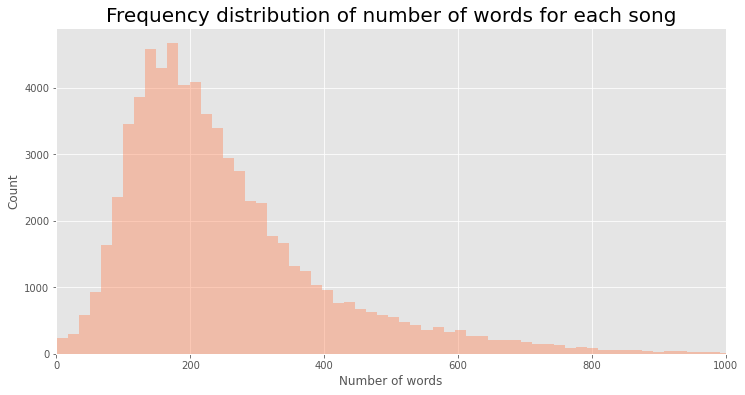

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(cleanlyrics['Number_of_words'],kde = False,color="coral",bins=200)
plt.title("Frequency distribution of number of words for each song", size=20)
plt.xlim(0,1000)
plt.xlabel("Number of words")
plt.ylabel("Count")

(0.0, 100.0)

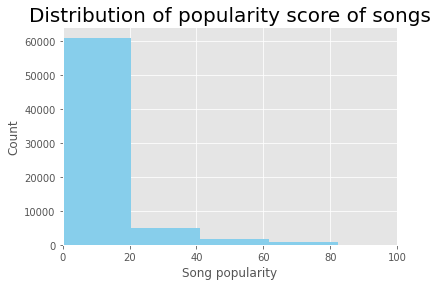

In [24]:
plt.hist(cleanlyrics['Popularity'],color="skyblue")
plt.title("Distribution of popularity score of songs", size=20)
plt.xlabel("Song popularity")
plt.ylabel("Count")
plt.xlim(0,100)

In [25]:
song_df['Genre'].unique()

array(['Pop', 'MPB', 'Axé', 'R&B', 'Hip Hop', 'Black Music',
       'Electronica', 'Romântico', 'Rap', 'Dance', 'Gospel/Religioso',
       'Soul Music', 'Rockabilly', 'Classic Rock', 'Rock', 'Folk',
       'Blues', 'Jazz', 'Soft Rock', 'Rock Alternativo', 'Hard Rock',
       'Funk', 'Bossa Nova', 'Indie', 'Reggae', 'Trip-Hop', 'Chillout',
       'House', 'Trance', 'Electro Swing', 'Progressivo', 'Clássico',
       'COLETÂNEA', 'New Age', 'Gótico', 'Heavy Metal', 'Country',
       'Sertanejo', 'Hardcore', 'Pop/Rock', 'Disco', 'Infantil',
       'Pós-Punk', 'K-Pop/K-Rock', 'Tecnopop', 'Emocore', 'Fado',
       'Surf Music', 'Punk Rock', 'Forró', 'Funk Carioca', 'Industrial',
       'Grunge'], dtype=object)

In [26]:
!pip install sqldf
import sqldf as sql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
query = """
SELECT Genre,avg(Popularity) as popularity_score
FROM song_df
group by Genre
order by popularity_score desc limit 10;
"""

In [29]:
popular_genre_df= sql.run(query)

In [30]:
popular_genre_df

Genre  popularity_score
0     Trip-Hop         39.416667
1    Hard Rock         37.369686
2          Pop         31.919172
3   Surf Music         21.400000
4   Rockabilly         15.284057
5        Indie         13.074717
6  Progressivo         12.178378
7    Soft Rock         12.026096
8        Dance         11.846237
9      Hip Hop         11.779637

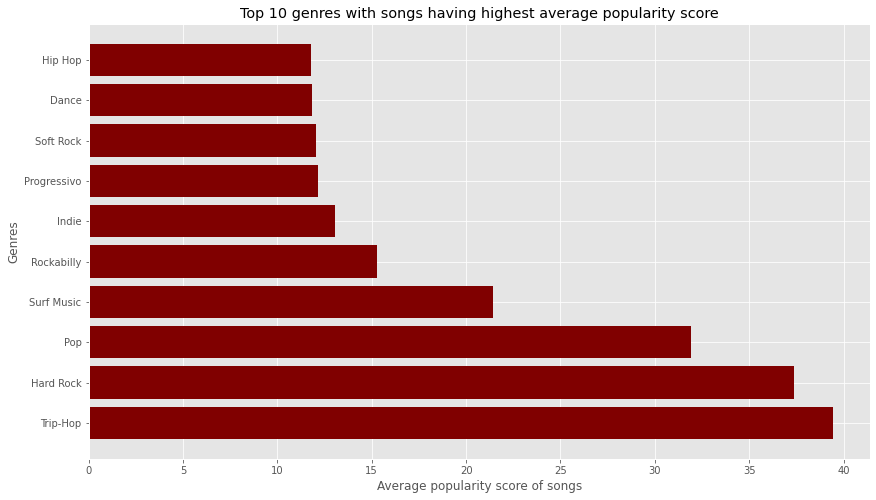

In [31]:
plt.figure(figsize=(14, 8))
plt.barh(popular_genre_df['Genre'], popular_genre_df['popularity_score'], color = 'maroon')
plt.xlabel("Average popularity score of songs")
plt.ylabel("Genres")
plt.title("Top 10 genres with songs having highest average popularity score")
plt.show()

In [32]:
query = """
SELECT Artist,count(Song_name) as Total_songs
FROM song_df
group by Artist 
order by Total_songs desc limit 20;
"""

In [33]:
artist_songs_df= sql.run(query)

In [34]:
artist_songs_df

Artist  Total_songs
0     Elvis Presley          747
1      Dolly Parton          723
2         Lil Wayne          689
3   Hillsong United          646
4       Chris Brown          623
5            Prince          564
6       Johnny Cash          555
7          Bee Gees          550
8         Bob Dylan          548
9      George Jones          534
10       Neil Young          515
11     Van Morrison          489
12       Snoop Dogg          485
13          50 Cent          466
14   Rolling Stones          436
15    Kylie Minogue          409
16     Eric Clapton          404
17     Taylor Swift          385
18  Waylon Jennings          383
19     Tupac Shakur          382

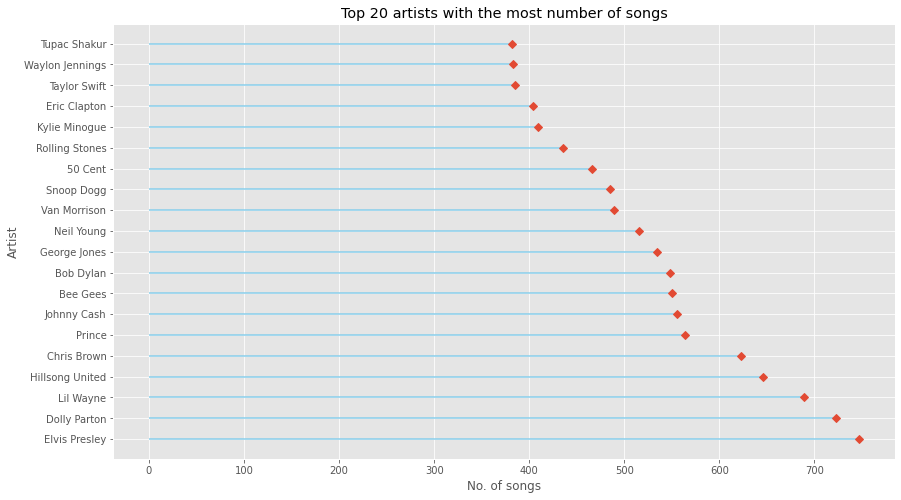

In [35]:
plt.figure(figsize=(14, 8))
plt.hlines(y=artist_songs_df['Artist'], xmin=0, xmax=artist_songs_df['Total_songs'], color='skyblue')
plt.plot(artist_songs_df['Total_songs'], artist_songs_df['Artist'], "D")
plt.xlabel("No. of songs")
plt.ylabel("Artist")
plt.title("Top 20 artists with the most number of songs")
plt.show()

In [36]:
query = """
SELECT Artist,avg(Popularity) as popularity_score
FROM song_df
group by Artist
order by popularity_score desc limit 10;
"""

In [37]:
popular_artist_df= sql.run(query)

In [38]:
popular_artist_df

Artist  popularity_score
0    Banda Beijo        205.500000
1        Beyoncé        204.958333
2            Sia        134.492857
3         Anitta        117.644444
4     Ed Sheeran        113.778182
5   José & Josué         72.700000
6   Taylor Swift         72.590909
7  Justin Bieber         66.761455
8     Bruno Mars         62.407377
9      Lady Gaga         56.188727

Text(0.5, 1.0, 'Top 10 artists with most popular songs')

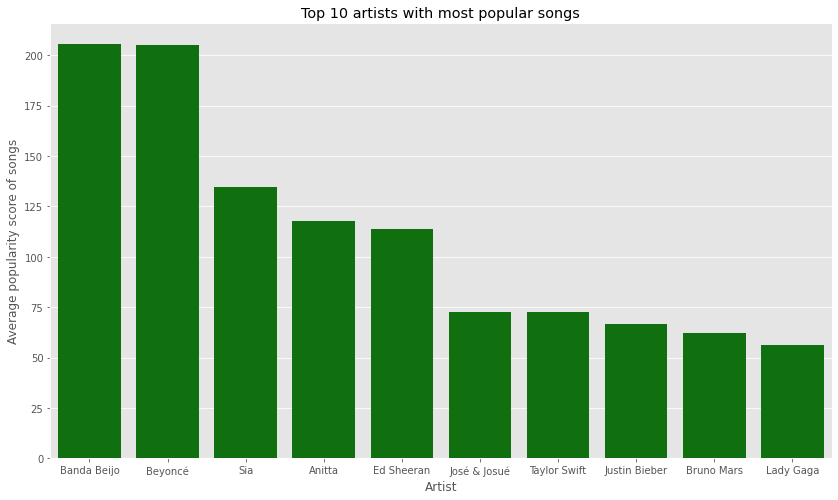

In [39]:
plt.figure(figsize=(14, 8))

sns.barplot(x="Artist", y="popularity_score", data=popular_artist_df, estimator=np.mean, ci=95, capsize=.2, color='green')
plt.xlabel("Artist")
plt.ylabel("Average popularity score of songs")
plt.title("Top 10 artists with most popular songs")

In [40]:
query = """
SELECT Song_name,Popularity,Genre, Lyrics
FROM song_df
where Genre = 'Trip-Hop'
order by Popularity desc limit 5;
"""
popular_songs_df1= sql.run(query)
popular_songs_df1



Song_name  Popularity     Genre  \
0  You Make Love Worthwhile       135.1  Trip-Hop   
1               Unstoppable       135.1  Trip-Hop   
2                Chandelier       135.1  Trip-Hop   
3             Cheap Thrills       135.1  Trip-Hop   
4             Bird Set Free       135.1  Trip-Hop   

                                              Lyrics  
0  I get up and comes to me\nThe things you make ...  
1  I'll smile, I know what it takes to fool this ...  
2  Party girls don't get hurt\nCan't feel anythin...  
3  Come on\nCome on (turn the radio on)\nIt's Fri...  
4  Clipped wings, I was a broken thing\nHad a voi...

In [41]:
query = """
SELECT Song_name,Popularity,Genre,Lyrics
FROM song_df
where Genre = 'Hard Rock'
order by Popularity desc limit 5;
"""
popular_songs_df2= sql.run(query)
popular_songs_df2

Song_name  Popularity      Genre  \
0        Wood Goblins        45.9  Hard Rock   
1        It's My Life        45.9  Hard Rock   
2  Livin' On A Prayer        45.9  Hard Rock   
3              Always        45.9  Hard Rock   
4        Bed Of Roses        45.9  Hard Rock   

                                              Lyrics  
0  I've had it now\nCan't seem to think\n(My mood...  
1  This ain't a song for the broken-hearted\nNo s...  
2  Once upon a time\nNot so long ago\n\nTommy use...  
3  This Romeo is bleeding\nBut you can't see his ...  
4  Sitting here, wasted and wounded\nAt this old ...

In [42]:
query = """
SELECT Song_name,Popularity,Genre,Lyrics
FROM song_df
where Genre = 'Pop'
order by Popularity desc limit 5;
"""
popular_songs_df3= sql.run(query)
popular_songs_df3


Song_name  Popularity Genre  \
0  Walking On The Moon       205.5   Pop   
1                 Halo       205.5   Pop   
2            Partition       205.5   Pop   
3      If I Were A Boy       205.5   Pop   
4          Love On Top       205.5   Pop   

                                              Lyrics  
0  Giant steps are what you take\nWalking on the ...  
1  Remember those walls I built\nWell baby they'r...  
2  Driver roll up the partition please\nDriver ro...  
3  If I were a Boy\nEven Just for a day\nI'd Roll...  
4  Bring the beat in!\n\nHoney, honey\nI can see ...

In [43]:
query = """
SELECT Song_name,Popularity,Genre,Lyrics
FROM song_df
where Genre = 'Surf Music'
order by Popularity desc limit 5;
"""
popular_songs_df4= sql.run(query)
popular_songs_df4

Song_name  Popularity       Genre  \
0  You Need To Cut Your Hair        21.4  Surf Music   
1            Better Together        21.4  Surf Music   
2                Upside Down        21.4  Surf Music   
3           Times Like These        21.4  Surf Music   
4  Sitting, Waiting, Wishing        21.4  Surf Music   

                                              Lyrics  
0  Well I walked from my house to yours\nIn a war...  
1  There is no combination of words\nI could put ...  
2  Who's to say\nWhat's impossible\nWell they for...  
3  In times like these\nIn times like those\nWhat...  
4  While I was sitting waiting wishing\nThat you ...

In [44]:
query = """
SELECT Song_name,Popularity,Genre,Lyrics
FROM song_df
where Genre = 'Rockabilly'
order by Popularity desc limit 5;
"""
popular_songs_df5= sql.run(query)
popular_songs_df5

Song_name  Popularity       Genre  \
0                     Windows        23.1  Rockabilly   
1  Can't Help Falling In Love        23.1  Rockabilly   
2            Suspicious Minds        23.1  Rockabilly   
3           Always On My Mind        23.1  Rockabilly   
4              Love Me Tender        23.1  Rockabilly   

                                              Lyrics  
0  I told you one before,\nI'm not insane\nThere'...  
1  Wise men say, only fools rush in\nBut I can't ...  
2  We're caught in a trap\nI can't walk out\nBeca...  
3  Maybe I didn't treat you,\nQuite as good as I ...  
4  Love me tender, love me sweet,\nNever let me g...

In [45]:
popular_songs_df1 = popular_songs_df1.append(popular_songs_df2).append(popular_songs_df3).append(popular_songs_df4).append(popular_songs_df5)

In [46]:
popular_songs_df1

Song_name  Popularity       Genre  \
0    You Make Love Worthwhile       135.1    Trip-Hop   
1                 Unstoppable       135.1    Trip-Hop   
2                  Chandelier       135.1    Trip-Hop   
3               Cheap Thrills       135.1    Trip-Hop   
4               Bird Set Free       135.1    Trip-Hop   
0                Wood Goblins        45.9   Hard Rock   
1                It's My Life        45.9   Hard Rock   
2          Livin' On A Prayer        45.9   Hard Rock   
3                      Always        45.9   Hard Rock   
4                Bed Of Roses        45.9   Hard Rock   
0         Walking On The Moon       205.5         Pop   
1                        Halo       205.5         Pop   
2                   Partition       205.5         Pop   
3             If I Were A Boy       205.5         Pop   
4                 Love On Top       205.5         Pop   
0   You Need To Cut Your Hair        21.4  Surf Music   
1             Better Together        21.4  Surf Music   
2                 Upside Down        21.4  Surf Music   
3            Times Like These        21.4  Surf Music   
4   Sitting, Waiting, Wishing        21.4  Surf Music   
0                     Windows        23.1  Rockabilly   
1  Can't Help Falling In Love        23.1  Rockabilly   
2            Suspicious Minds        23.1  Rockabilly   
3           Always On My Mind        23.1  Rockabilly   
4              Love Me Tender        23.1  Rockabilly   

                                              Lyrics  
0  I get up and comes to me\nThe things you make ...  
1  I'll smile, I know what it takes to fool this ...  
2  Party girls don't get hurt\nCan't feel anythin...  
3  Come on\nCome on (turn the radio on)\nIt's Fri...  
4  Clipped wings, I was a broken thing\nHad a voi...  
0  I've had it now\nCan't seem to think\n(My mood...  
1  This ain't a song for the broken-hearted\nNo s...  
2  Once upon a time\nNot so long ago\n\nTommy use...  
3  This Romeo is bleeding\nBut you can't see his ...  
4  Sitting here, wasted and wounded\nAt this old ...  
0  Giant steps are what you take\nWalking on the ...  
1  Remember those walls I built\nWell baby they'r...  
2  Driver roll up the partition please\nDriver ro...  
3  If I were a Boy\nEven Just for a day\nI'd Roll...  
4  Bring the beat in!\n\nHoney, honey\nI can see ...  
0  Well I walked from my house to yours\nIn a war...  
1  There is no combination of words\nI could put ...  
2  Who's to say\nWhat's impossible\nWell they for...  
3  In times like these\nIn times like those\nWhat...  
4  While I was sitting waiting wishing\nThat you ...  
0  I told you one before,\nI'm not insane\nThere'...  
1  Wise men say, only fools rush in\nBut I can't ...  
2  We're caught in a trap\nI can't walk out\nBeca...  
3  Maybe I didn't treat you,\nQuite as good as I ...  
4  Love me tender, love me sweet,\nNever let me g...

In [47]:
import plotly.express as px
plt.figure(figsize=(20, 12))  
fig = px.sunburst(popular_songs_df1, path=['Genre', 'Song_name'], 
                  values='Popularity',title='Genre wise top 5 popular songs')
fig

<Figure size 1440x864 with 0 Axes>

# NLP , word analysis 
## keywords:
  - love
  - like
  - hate
  - dance
  - friend
  - good
  - bad
  - people
  - feel
  - baby

In [48]:
keywords= ['love','like','hate','dance','friend','good','bad','people','feel','baby']

In [49]:

def remove_delimiters(sentence):
    return re.sub(r'[^\w\s]', '', sentence)

def tokenization(lyrics):
    lowercase_word_corpus=[]
    trimmed_sentences=remove_delimiters(lyrics)
    word_corpus = word_tokenize( trimmed_sentences)   
    ps = PorterStemmer()
    filtered_words = [ps.stem(w) for w in word_corpus]
    lowercase_word_corpus = [re.sub(r'\W+', '', word.lower()) for word in word_corpus] 
    return lowercase_word_corpus


def top_words(words,inputlist):
    lowercase_word_corpus=tokenization(words)
    if inputlist!="":
      fdist=nltk.FreqDist((word) for word in lowercase_word_corpus if word in inputlist)
    else :
      fdist=nltk.FreqDist((word) for word in lowercase_word_corpus)
    total_models=sum(fdist.values())
    for modelfreq in fdist.keys():
      fdist[modelfreq] /= total_models
    df=pd.DataFrame(list(fdist.items()), columns = ["Keyword","Reletive frequency"])
    df.set_index("Keyword", inplace=True) 
    return df


def wordcloud_out(word_corpus, title):
  wordcloud = WordCloud(stopwords=all_stopwords, colormap='tab20c').generate(word_corpus)
  plt.figure( figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(title, fontsize=13)
  plt.axis("off")
  plt.show()

#### Top songs analysis

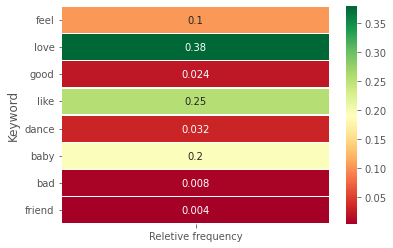

In [50]:
All_Lyrics=[]
All_Lyrics.extend(popular_songs_df1['Lyrics'])
All_Lyrics=''.join(map(str,All_Lyrics))

freq_distribtuion = top_words(All_Lyrics,keywords) 
freq_distribtuion
sns.heatmap(freq_distribtuion, cmap ='RdYlGn', linewidths = 0.50, annot = True)

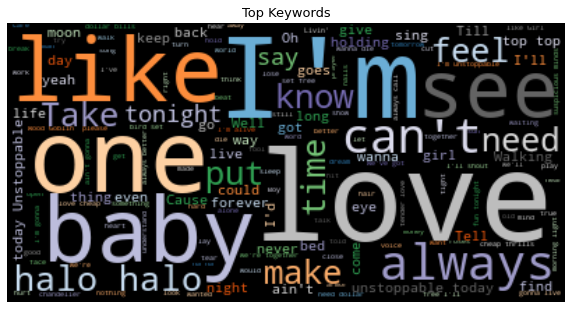

In [51]:
wordcloud_out(All_Lyrics, "Top Keywords")

# Popular Artist word choices

In [52]:
Popular_Artists= popular_artist_df["Artist"]
def artist_fev(artists):
  artist_Lyrics_dict={}
  for artist in artists:
       artist_Lyrics=[]   
       artist_Lyrics.extend( song_df.loc[song_df['Artist'] == artist] ['Lyrics'])
       artist_Lyrics=''.join(map(str,artist_Lyrics))
       artist_Lyrics_dict[artist]=artist_Lyrics
  return artist_Lyrics_dict



In [131]:
Popular_Artist_Lyrics_dict=artist_fev(Popular_Artists)
Popular_Artist_Lyrics=pd.DataFrame.from_dict(Popular_Artist_Lyrics_dict, orient ='index')
Popular_Artist_Lyrics

0
Banda Beijo    Giant steps are what you take\nWalking on the ...
Beyoncé        Remember those walls I built\nWell baby they'r...
Sia            I'll smile, I know what it takes to fool this ...
Anitta         Sometimes I call you when I can't sleep\nAlone...
Ed Sheeran     The club isn't the best place to find a lover\...
José & Josué   God, I am here today to say in thy house,\nTha...
Taylor Swift   We could leave the Christmas lights up 'til Ja...
Justin Bieber  Lately, I've been losing my mind\nCertain thin...
Bruno Mars     One, two\nOne, two, three\n\nOh yeah yeah\nOh ...
Lady Gaga      That Arizona sky\nBurnin' in your eyes\nYou lo...

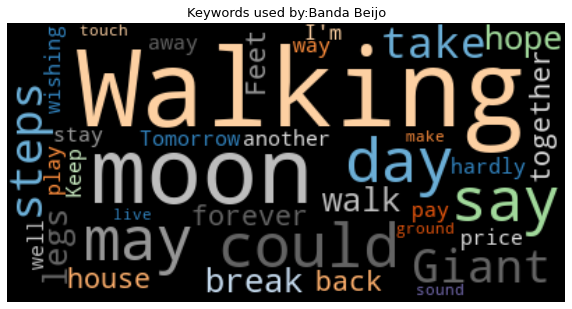

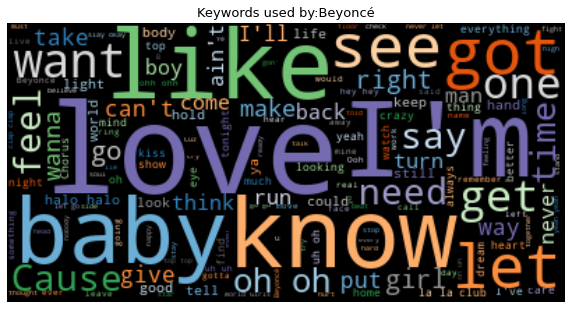

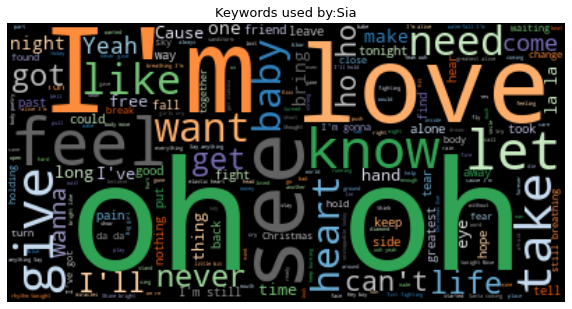

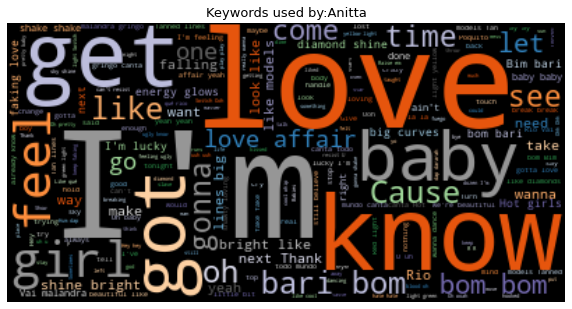

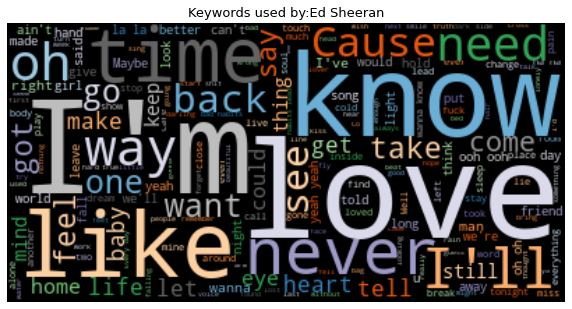

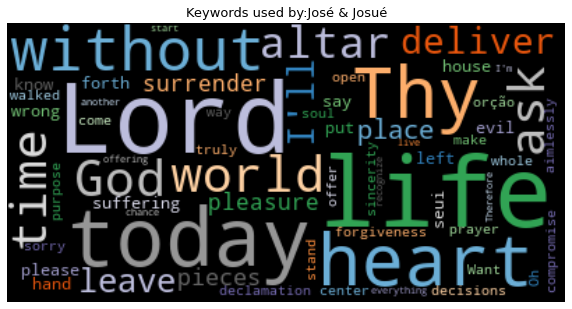

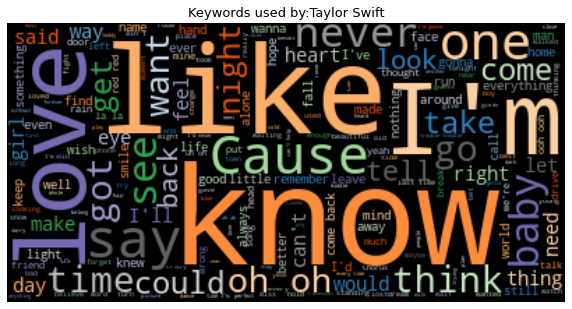

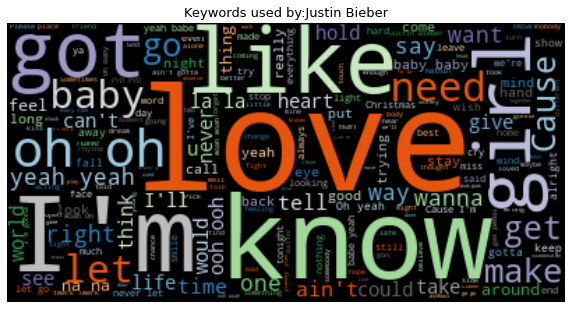

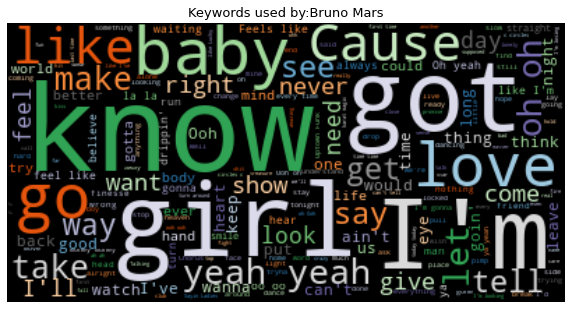

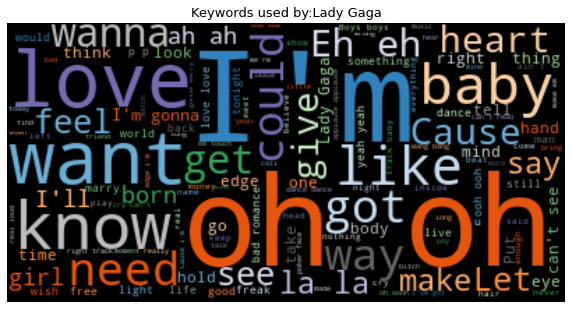

In [54]:
for artist in Popular_Artists:
       wordcloud_out(Popular_Artist_Lyrics.loc[artist][0], "Keywords used by"+":" + artist)


In [55]:
cfd= nltk.ConditionalFreqDist((Artist, word.lower()) for Artist in Popular_Artists 
                              for word in tokenization(Popular_Artist_Lyrics_dict[Artist]) if word.lower() in keywords)

In [56]:
relative_frequenency_distribtuion=pd.DataFrame(cfd)
relative_frequenency_distribtuion=(relative_frequenency_distribtuion/relative_frequenency_distribtuion.sum())
relative_frequenency_distribtuion
relative_frequenency_distribtuion.style.background_gradient(axis=0)  

# Popular Genres 

In [57]:
top_genres= popular_genre_df["Genre"]
def genre_fev(genres):
  Top_genre_Lyrics_dict={}
  for genre in genres:
       Top_genre_Lyrics=[]   
       Top_genre_Lyrics.extend( song_df.loc[song_df['Genre'] == genre] ['Lyrics'])
       Top_genre_Lyrics=''.join(map(str,Top_genre_Lyrics))
       Top_genre_Lyrics_dict[genre]=Top_genre_Lyrics
  return Top_genre_Lyrics_dict
Top_genre_Lyrics_dict=genre_fev(top_genres)
Top_genre_Lyrics=pd.DataFrame.from_dict(Top_genre_Lyrics_dict, orient ='index')
Top_genre_Lyrics

0
Trip-Hop     Thou be son of Peace\nThou may Spread the love...
Hard Rock    You made me love you\nI didn't wanna do it\nI ...
Pop          I feel so unsure\nAs I take your hand and lead...
Surf Music   Well I walked from my house to yours\nIn a war...
Rockabilly   I told you one before,\nI'm not insane\nThere'...
Indie        Just think of things like daffodils\nand peace...
Progressivo  Hey Mama, I dont know if you notice\nbut I've ...
Soft Rock    Work me, Lord,\nWork me, Lord.\nPlease don't y...
Dance        I don't know what else you want me to do baby\...
Hip Hop      [Rihanna]\nI remember when the world was just ...

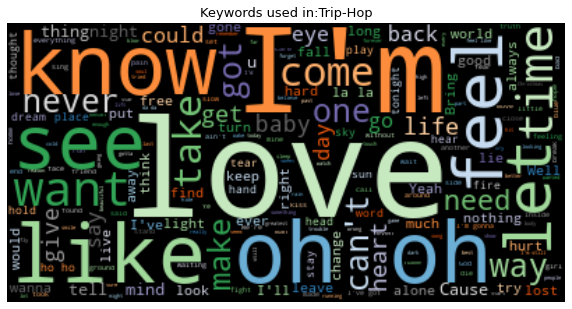

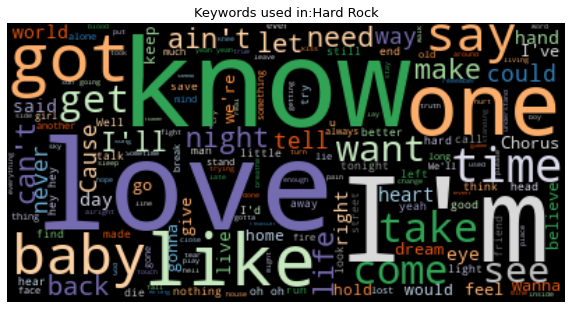

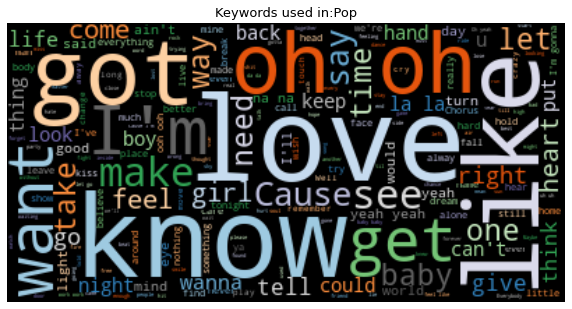

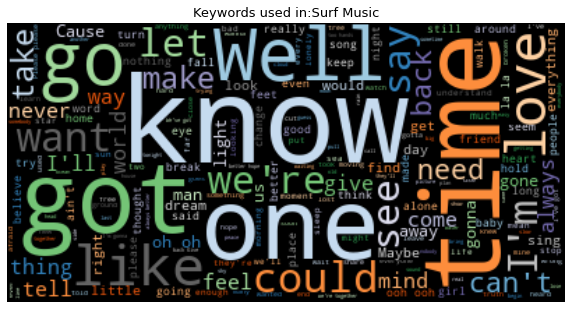

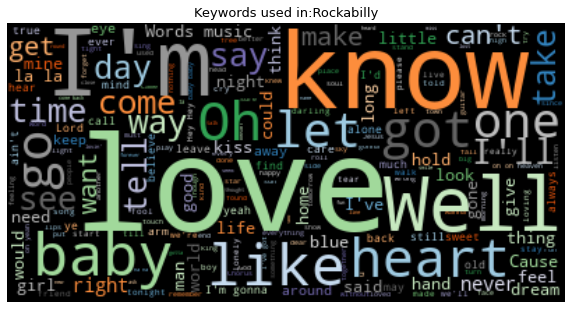

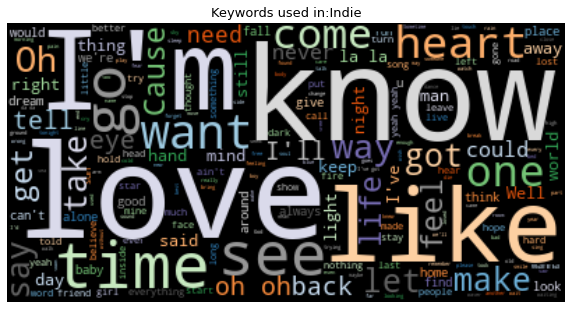

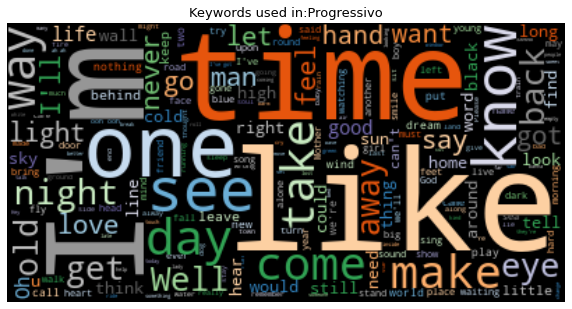

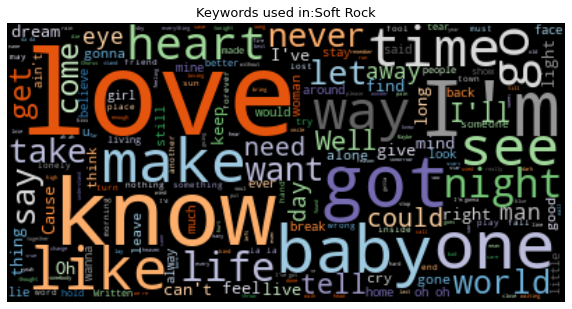

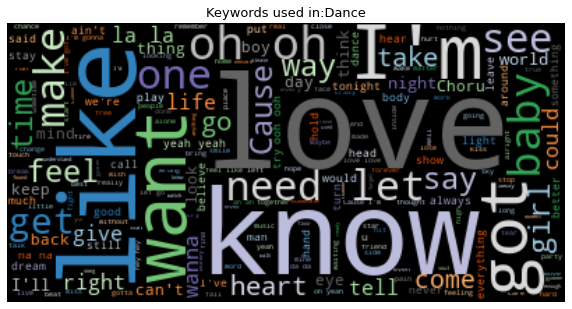

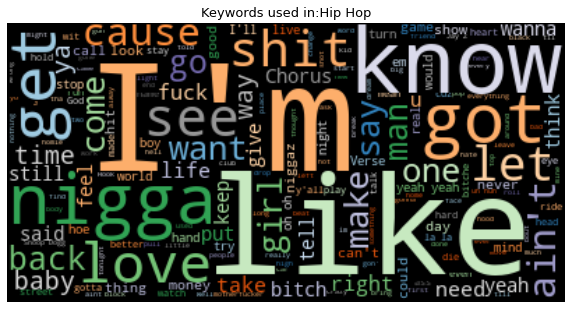

In [58]:
for genre in top_genres:
       wordcloud_out(Top_genre_Lyrics.loc[genre][0], "Keywords used in"+":" + genre)

In [59]:
cfd= nltk.ConditionalFreqDist((genre, word.lower()) for genre in  top_genres
                              for word in tokenization(Top_genre_Lyrics_dict[genre]) if word.lower() in keywords)

In [60]:
relative_frequenency_distribtuion=pd.DataFrame(cfd)
relative_frequenency_distribtuion.style.background_gradient(axis=0)  


# Sentiment analysis for Top Artists

In [132]:
# This piece of code is refered from the Keggle  
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def setimentanalyzer(df):
    neg='Negative'
    neu='Neutral'
    pos='Positive'
    negative = []
    neutral = []
    positive = []
    dominant_sentiment=[]
    dominant_sentiment_score=[]
    #Initialize the model
    sid = SentimentIntensityAnalyzer()
    #Iterate for each row of lyrics and append the scores
    for i in df.index:       
        scores = sid.polarity_scores(df.loc[i][0])
        negative.append(scores['neg'])
        neutral.append(scores['neu'])
        positive.append(scores['pos'])
        if scores['neg']>scores['pos']:
            dominant_sentiment_score.append(scores['neg'])
            dominant_sentiment.append(neg)
        elif scores['neg']<scores['pos']:
            dominant_sentiment_score.append(scores['pos'])
            dominant_sentiment.append(pos)
        else:
            dominant_sentiment_score.append(scores['neu'])
            dominant_sentiment.append(neu)
    #Create 5 columns to the main data frame  for each score
    df['negative'] = negative
    df['neutral'] = neutral
    df['positive'] = positive
    df['dominant_sentiment']=dominant_sentiment
    df['dominant_sentiment_score']=dominant_sentiment_score
    return df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [133]:
setimentanalyzer(Popular_Artist_Lyrics)

0  negative  \
Banda Beijo    Giant steps are what you take\nWalking on the ...     0.038   
Beyoncé        Remember those walls I built\nWell baby they'r...     0.093   
Sia            I'll smile, I know what it takes to fool this ...     0.113   
Anitta         Sometimes I call you when I can't sleep\nAlone...     0.157   
Ed Sheeran     The club isn't the best place to find a lover\...     0.090   
José & Josué   God, I am here today to say in thy house,\nTha...     0.081   
Taylor Swift   We could leave the Christmas lights up 'til Ja...     0.099   
Justin Bieber  Lately, I've been losing my mind\nCertain thin...     0.091   
Bruno Mars     One, two\nOne, two, three\n\nOh yeah yeah\nOh ...     0.078   
Lady Gaga      That Arizona sky\nBurnin' in your eyes\nYou lo...     0.109   

               neutral  positive dominant_sentiment  dominant_sentiment_score  
Banda Beijo      0.855     0.107           Positive                     0.107  
Beyoncé          0.706     0.200           Positive                     0.200  
Sia              0.684     0.203           Positive                     0.203  
Anitta           0.661     0.182           Positive                     0.182  
Ed Sheeran       0.730     0.179           Positive                     0.179  
José & Josué     0.771     0.148           Positive                     0.148  
Taylor Swift     0.729     0.172           Positive                     0.172  
Justin Bieber    0.727     0.182           Positive                     0.182  
Bruno Mars       0.727     0.195           Positive                     0.195  
Lady Gaga        0.697     0.195           Positive                     0.195

In [134]:
sentiment= setimentanalyzer(Popular_Artist_Lyrics).drop(0, axis=1)

In [138]:
sentiment.style.background_gradient(axis=0)  

<h2><center>Conclusion <a name="Conclusion"></a></center></h2> 

The above analysis is a clear walkthrough of NLP tasks, and it was great learning to understand the concept of text tokenization, normalization, and analyzing the reason behind some words’ repetition in the text, and can interpret the context of the text. For someone like me who is learning ML and NLP from the basics, it was a good exercise.

In the end, We would say thanks to the professor again to deliver such a wonderful session and provide us with an opportunity to learn python  from the basics. 

</br>
</br>
</br>

<h2><center>References: <a name="References"></a></center></h2> 

[1] Accessing Text Corpora and Lexical Resources. (n.d.). https://www.nltk.org/book/ch02.html 

[2] GeeksforGeeks. (2018, December 18). Get the index of minimum value in DataFrame column. https://www.geeksforgeeks.org/get-the-index-of-minimum-value-in-dataframe-column/ 

[3] Gübür, K. T. (2022, April 20). NLTK and Python WordNet: Find Synonyms and Antonyms with Python. Holistic SEO. https://www.holisticseo.digital/python-seo/nltk/wordnet 

[4] How to set Column as Index in Pandas DataFrame? - Python Examples. (n.d.). https://pythonexamples.org/pandas-set-column-as-index/ 

[5] nltk.ConditionalFreqDist. (n.d.). https://tedboy.github.io/nlps/generated/generated/nltk.ConditionalFreqDist.html 

[6] pandas.DataFrame.from_dict — pandas 1.5.1 documentation. (n.d.). https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html 

[7] Post author: Malli. (2022, January 6). Spark by {Examples}. https://sparkbyexamples.com/pandas/pandas-get-total-of-column/ 

[8] Python: Get Dictionary Key with the Max Value (4 Ways). (2022, February 23). Datagy. https://datagy.io/python-get-dictionary-key-with-max-value/ 

[9] Song Lyrics Dataset. (2021, February 8). Kaggle. https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset/code  

</br>
</br>
</br>

<h2><center>Appendix: <a name="Appendix"></a></center></h2> 

Below HTML code we used for shaping the document by applying some CSS styling.

In [1]:
%%html
<style>
.rendered_html {
    font-size: 16px;
    font-family: Times New Roman, serif;
    line-height: 2;
    text-align:left;
}
</style>